<a href="https://colab.research.google.com/github/uzeziogho/Kaggle-competitions/blob/main/REnt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import make_column_selector as selector
from sklearn.pipeline import Pipeline

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
houstst=pd.read_csv('/content/test (1).csv')
houstrn=pd.read_csv('/content/train (1).csv')

In [3]:
# Impute missing values with the mean
houstrn['LotFrontage'].fillna(houstrn['LotFrontage'].mean(), inplace=True)
houstrn['LotFrontage']=houstrn['LotFrontage'].astype(float)

# Impute missing values with the mean
houstst['LotFrontage'].fillna(houstst['LotFrontage'].mean(), inplace=True)
houstst['LotFrontage']=houstst['LotFrontage'].astype(float)

In [ ]:
houstst[['MSZoning','SaleType']]
# Create a new category for missing values
houstst["MSZoning"] = houstst["MSZoning"].fillna("unknown")
houstst['MSZoning'] = houstst['MSZoning'].astype(str)
# Create a new category for missing values
houstst["SaleType"] = houstst["SaleType"].fillna("unknown")
houstst['SaleType'] = houstst['SaleType'].astype(str)

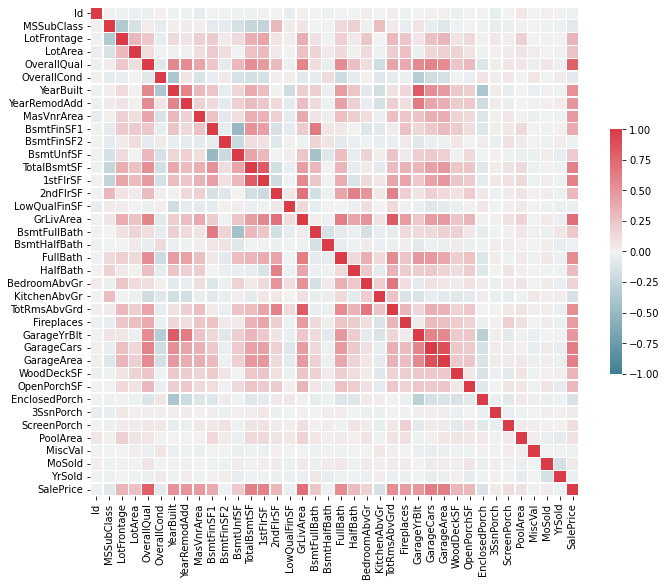

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the pairwise correlations between the columns
corrTrn = houstrn.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corrTrn, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [13]:
!pip install skfeature-chappers
from skfeature.function.similarity_based import fisher_score
import matplotlib.pyplot as plt
%matplotlib inline

cat_df = houstrn.select_dtypes(include=['object'])
cat_df.describe()

X=cat_df
y=houstrn['SalePrice']

def encode_categorical(cat_df):
    for column in cat_df.columns:
          le = LabelEncoder()
          cat_df[column] = le.fit_transform(cat_df[column])
    return cat_df

df_encoded = encode_categorical(cat_df.copy())

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [14]:
print(df_encoded.head(5))

   MSZoning  Street  Alley  LotShape  LandContour  Utilities  LotConfig  \
0         3       1      2         3            3          0          4   
1         3       1      2         3            3          0          2   
2         3       1      2         0            3          0          4   
3         3       1      2         0            3          0          0   
4         3       1      2         0            3          0          2   

   LandSlope  Neighborhood  Condition1  ...  GarageType  GarageFinish  \
0          0             5           2  ...           1             1   
1          0            24           1  ...           1             1   
2          0             5           2  ...           1             1   
3          0             6           2  ...           5             2   
4          0            15           2  ...           1             1   

   GarageQual  GarageCond  PavedDrive  PoolQC  Fence  MiscFeature  SaleType  \
0           4           4      

In [15]:
X=df_encoded
y=houstrn['SalePrice']

In [19]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
X_norm = MinMaxScaler().fit_transform(X)
chi_selector = SelectKBest(chi2, k=10)
chi_selector.fit(X_norm, y)
chi_support = chi_selector.get_support()
chi_feature = X.loc[:,chi_support].columns.tolist()
print(str(len(chi_feature)), 'selected features')

10 selected features
